# Stackoverflow Survey Data Analysis

Import required libs

In [257]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import math


style.use('seaborn')
# style.available

Load Stackoverflow data

In [258]:
data = pd.read_csv('data/2019/survey_results_public.csv')


Clean the data

In [259]:
idx = 0
for row in data['Ethnicity']:
    if not isinstance(row, str):
        data.loc[idx, 'Ethnicity']='Not Specified'
    else:
        split_count = len(row.split(';'))
        if split_count > 2:
            data.loc[idx, 'Ethnicity']='Multiracial'
        elif split_count == 2:
             data.loc[idx, 'Ethnicity']='Biracial'
    idx +=1


data.Ethnicity

0                       Not Specified
1                       Not Specified
2                       Not Specified
3        White or of European descent
4                            Biracial
                     ...             
88878                   Not Specified
88879                   Not Specified
88880                   Not Specified
88881                   Not Specified
88882                        Biracial
Name: Ethnicity, Length: 88883, dtype: object

Lets create some functions to help us count usages of a language. We should output how many stack overflow respondants use each language in the list.

In [260]:
langs = ['Python','JavaScript','Java','C#','Scala','Swift','Objective-C','Go','Rust','C++']
language_users = []

def count_for_lang(dataFrame, lang):
    count = 0
    for ww in dataFrame.LanguageWorkedWith:
        # print(ww)
        if lang in str(ww):
            count += 1
    return count

def handle_pair(pair):
    (total, chunk) = pair
    return (chunk/total) * 100

def get_percs(totals, chunks):
    return list(map(handle_pair, zip(totals, chunks)))

for lang in langs:
   count = count_for_lang(data, lang)
   language_users.append(count)

language_users

[36443, 59219, 70113, 27097, 3309, 5744, 4191, 7201, 2794, 20524]

Now we want to see the gender distributeion in percentage in each of the languages.

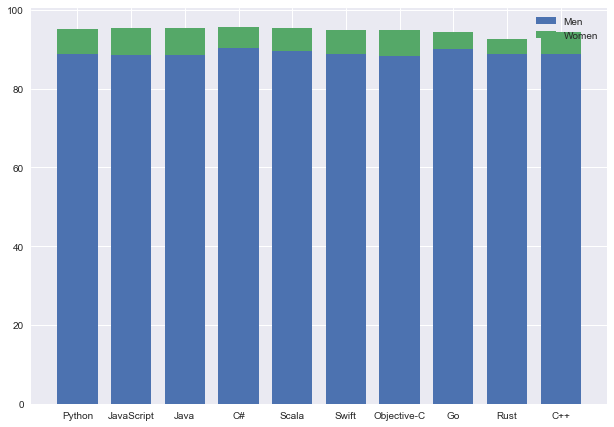

In [261]:
# Gather and plot Gender Data

dt_women  = data[data.Gender == 'Woman']
dt_men  = data[data.Gender == 'Man']


men = []
women = []
all_genders = []


for lang in langs:
   wc = count_for_lang(dt_women, lang) 
   women.append(wc)
   mc = count_for_lang(dt_men, lang)
   men.append(mc)
  

men_perc = get_percs(language_users,men)
women_perc = get_percs(language_users,women)

#draw bar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# ax.bar(langs, women)
# ax.bar(langs, men)
width = 0.75

# print(langs)
# print(women)
# print(men)

ax.bar(langs, men_perc, width)
ax.bar(langs, women_perc, width,bottom=men_perc)
ax.legend(labels=['Men', 'Women'])
plt.show()



Now lets look at ethnic diversity across these language communities.


In [262]:
ethnic_groups = []

for g in data.Ethnicity.unique():
    if isinstance(g, str):
        if not ';' in g and not ',' in g: #This data is a bit dirty
            ethnic_groups.append(g)

len(ethnic_groups)

9

In [263]:
data_by_group = []

for group_name in ethnic_groups:
    data_by_group.append(data[data.Ethnicity == group_name])


In [264]:
count_for_group = []

for g in data_by_group:
    group_langs = []
    for lang in langs:
        group_langs.append(count_for_lang(g, lang))
    count_for_group.append(group_langs)

count_for_group

[[4334, 7535, 9222, 3197, 361, 789, 637, 746, 279, 3159],
 [21540, 34431, 40108, 16946, 2007, 3225, 2286, 4640, 1984, 11273],
 [1615, 2535, 2989, 1101, 163, 231, 179, 336, 114, 786],
 [1535, 2234, 2718, 876, 140, 266, 200, 293, 82, 965],
 [882, 1267, 1451, 543, 87, 143, 99, 186, 99, 468],
 [779, 1519, 1774, 501, 50, 109, 56, 119, 32, 363],
 [1347, 2484, 2885, 1102, 131, 250, 166, 237, 66, 599],
 [982, 1654, 2052, 889, 70, 187, 122, 160, 34, 642],
 [3385, 5479, 6821, 1900, 294, 536, 439, 477, 99, 2242]]

In [265]:
percentage_for_group = []

for c in count_for_group:
    p = get_percs(language_users, c)
    percentage_for_group.append(p)



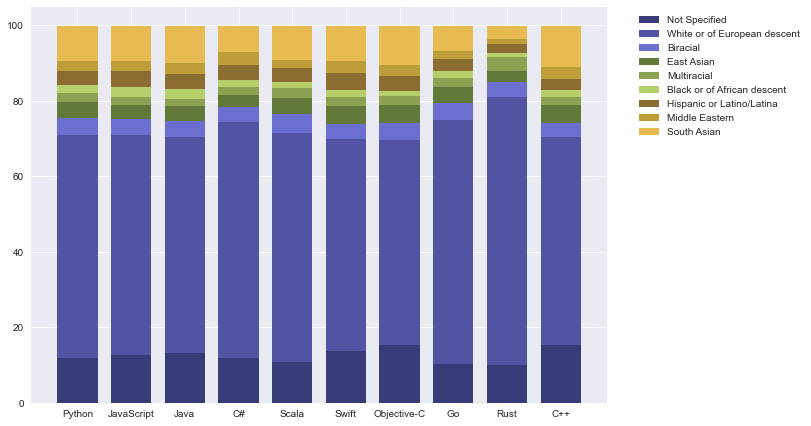

In [266]:
# Draw bar
NUM_COLORS = 16

cm = plt.get_cmap('tab20b')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

width = 0.75

totals = []
for idx, group in enumerate(percentage_for_group):
    if idx == 0:
        ax.bar(langs, group, width, color=scalarMap.to_rgba(idx))
        totals = group
    else:
        ax.bar(langs, group, width, bottom=totals, color=scalarMap.to_rgba(idx))
        for i in range(len(totals)):
            totals[i] = totals[i] + group[i]


ax.legend(labels=ethnic_groups, bbox_to_anchor=(1.04, 1))
plt.show()